In [1]:
import torch
from torchvision import transforms as T
from PIL import Image

from components.Conditional_Generator_asm import Generator

## Load the pretrained model

https://github.com/neuralchen/ASMAGAN/releases/download/v.1.1/ASMAfinal.zip

In [2]:
Gen = Generator(chn=32, k_size=3, res_num=8, class_num=11)

checkpoint = 'train_logs/ASMAfinal/checkpoints/350000_Generator.pth'
Gen.load_state_dict(torch.load(checkpoint, map_location=torch.device('cpu'))['g_model'])

Gen.eval()

print('Loaded!')

Loaded!


## Load a content image

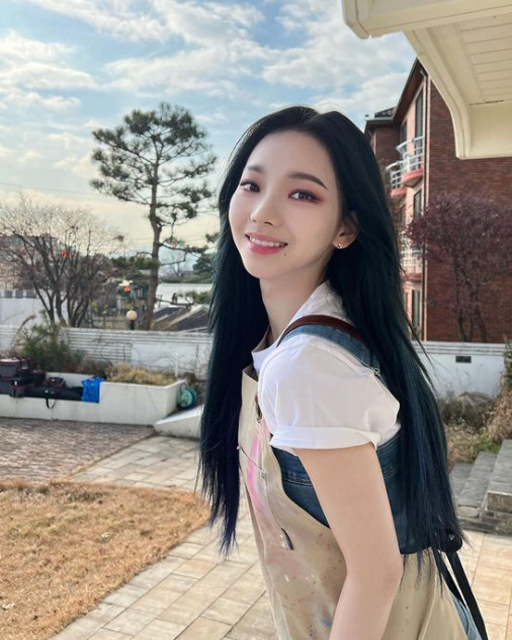

In [31]:
img = Image.open('bench/karina_00.jpg')

w = img.size[0]
h = img.size[1]

w = round(w / 32.0) * 32
h = round(h / 32.0) * 32

img = img.resize((w, h))

img

## Preprocess

In [32]:

transform = T.Compose([
    # T.Resize((1088, 1920)),
    T.ToTensor(),
    T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

x = transform(img).unsqueeze(0)

x.shape

torch.Size([1, 3, 640, 512])

## Inference

**Styles**

- 0: berthe-morisot
- 1: edvard-munch
- 2: ernst-ludwig-kirchner
- 3: jackson-pollock
- 4: kandinsky
- 5: monet
- 6: nicholas
- 7: paul-cezanne
- 8: picasso
- 9: samuel
- 10: vangogh

In [69]:
style = torch.tensor([8], dtype=torch.long)

res, _ = Gen(x, style)

res.shape

torch.Size([1, 3, 640, 512])

## Postprocess

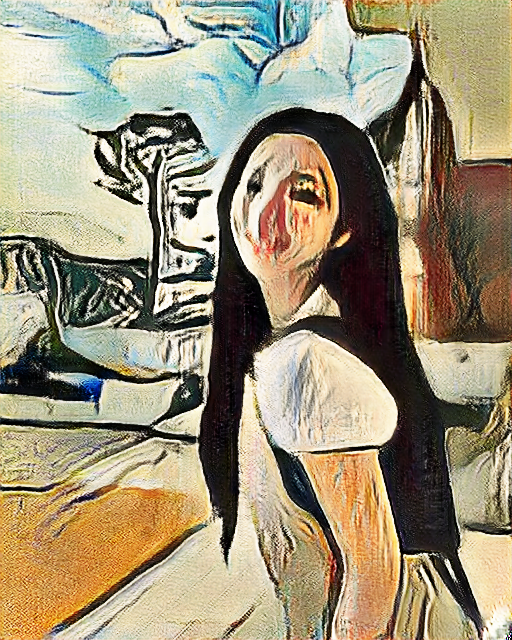

In [70]:
out = (res.squeeze() + 1) / 2
out = out.mul(255).clamp_(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()

im = Image.fromarray(out)
im = im.resize(img.size)

im